# 資料清理

In [153]:
import twstock
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 获取台積電股票的历史数据
stock = twstock.Stock("6547")
history = stock.fetch_from(2022, 1)  # 从2022年1月份开始的历史数据

# 将历史数据转换为 pandas DataFrame
df = pd.DataFrame(history)

# 计算技术指标
df = add_all_ta_features(df, open="open", high="high", low="low", close="close", volume="capacity")

# 打印数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       341 non-null    datetime64[ns]
 1   capacity                   341 non-null    int64         
 2   turnover                   341 non-null    int64         
 3   open                       341 non-null    float64       
 4   high                       341 non-null    float64       
 5   low                        341 non-null    float64       
 6   close                      341 non-null    float64       
 7   change                     341 non-null    float64       
 8   transaction                341 non-null    int64         
 9   volume_adi                 341 non-null    float64       
 10  volume_obv                 341 non-null    int64         
 11  volume_cmf                 322 non-null    float64       
 12  volume_f

C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [154]:
# 選擇要保留的指標
selected_columns = ['date' ,'open', 'high', 'low', 'close', 'capacity', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]


# 打印結果
print(df)

          date   open   high    low  close  capacity  trend_macd_diff   
0   2022-01-03  288.0  288.0  269.5  279.5   4994000              NaN  \
1   2022-01-04  271.0  278.5  270.5  275.0   2004000              NaN   
2   2022-01-05  274.0  283.5  274.0  279.0   2213000              NaN   
3   2022-01-06  279.5  286.0  278.0  278.0   1765000              NaN   
4   2022-01-07  284.0  286.0  278.5  279.0   1920000              NaN   
..         ...    ...    ...    ...    ...       ...              ...   
336 2023-05-29   62.6   63.7   62.6   62.6   1667000         0.257035   
337 2023-05-30   63.2   63.2   61.9   61.9   1392000         0.205620   
338 2023-05-31   61.3   62.0   61.2   62.0   1732000         0.172284   
339 2023-06-01   62.0   62.8   61.5   62.0   1052000         0.145252   
340 2023-06-02   62.0   62.8   61.5   61.5   1429000         0.091348   

     trend_ema_fast  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4            

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             341 non-null    datetime64[ns]
 1   open             341 non-null    float64       
 2   high             341 non-null    float64       
 3   low              341 non-null    float64       
 4   close            341 non-null    float64       
 5   capacity         341 non-null    int64         
 6   trend_macd_diff  308 non-null    float64       
 7   trend_ema_fast   330 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 21.4 KB


In [156]:
import pandas as pd
import ta

# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['close'],
    high=df['high'],
    low=df['low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-02-28')
dfmodel = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

df = df.round(3) 
df = df.reset_index(drop=True)

# 將"date"列設定為索引列
dfmodel.set_index('date', inplace=True)

print(dfmodel)


             open   high    low  close  capacity  trend_macd_diff   
date                                                                
2022-01-03  288.0  288.0  269.5  279.5   4994000              NaN  \
2022-01-04  271.0  278.5  270.5  275.0   2004000              NaN   
2022-01-05  274.0  283.5  274.0  279.0   2213000              NaN   
2022-01-06  279.5  286.0  278.0  278.0   1765000              NaN   
2022-01-07  284.0  286.0  278.5  279.0   1920000              NaN   
...           ...    ...    ...    ...       ...              ...   
2023-02-20   63.1   63.5   62.0   63.3   3962000        -1.024654   
2023-02-21   63.8   64.2   63.0   63.0   2403000        -1.053726   
2023-02-22   62.8   62.8   61.0   61.1   3700000        -1.125130   
2023-02-23   61.5   63.8   61.1   63.0   3550000        -0.974253   
2023-02-24   63.0   63.2   61.3   61.7   2573000        -0.893960   

            trend_ema_fast         KD        RSI  
date                                              


In [157]:
dfmodel.tail(60)

,open,high,low,close,capacity,trend_macd_diff,trend_ema_fast,KD,RSI
date,,,,,,,,,
2022-11-22,81.3,81.9,77.0,78.1,5038000,2.079465,76.211299,66.480447,53.215205
2022-11-23,78.1,79.8,78.1,78.6,2707000,1.784568,76.578791,68.750000,53.889581
2022-11-24,79.0,79.4,77.4,77.8,2320000,1.465181,76.766670,64.204545,52.583555
2022-11-25,78.2,79.0,75.7,75.7,3619000,1.060885,76.602567,52.272727,49.211988
2022-11-28,69.4,76.0,68.8,74.9,8488000,0.705108,76.340633,46.198830,47.950649
2022-11-29,74.2,81.9,73.8,79.4,8565000,0.735019,76.811305,69.281046,54.945887
2022-11-30,79.2,81.2,78.9,81.0,4517000,0.818357,77.455720,79.738562,57.150947
2022-12-01,81.1,81.9,80.4,80.7,3424000,0.807695,77.954840,77.777778,56.591673
2022-12-02,81.5,82.2,80.7,80.9,2696000,0.768742,78.407941,79.084967,56.894523


In [158]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2022-01-03 to 2023-02-24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             277 non-null    float64
 1   high             277 non-null    float64
 2   low              277 non-null    float64
 3   close            277 non-null    float64
 4   capacity         277 non-null    int64  
 5   trend_macd_diff  244 non-null    float64
 6   trend_ema_fast   266 non-null    float64
 7   KD               264 non-null    float64
 8   RSI              264 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 21.6 KB


# 模型建構

### SVR

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['open', 'high', 'low', 'close', 'capacity', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 20, 'C': 0.1, 'epsilon': 0.5}
最佳相对误差: 0.0 %


SVR(C=0.1, epsilon=0.5)

In [160]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[120.79938643 120.01104364 119.44560147 122.44012395 122.91749516
 121.19767289 118.56657701 118.59157559 120.02062389 121.46806924
 122.45432411 121.09968239 118.5882716  120.37728206 122.31095622
 121.62206652 122.2315697  123.36301629 122.29382247 123.24567448
 122.91516122 123.93020725 120.78185036 120.84266602 121.20182122
 123.57040351 121.45973885 123.76308235 122.2022718  123.02766383
 119.93008785 118.64173827 121.07903258 120.69994793 119.13863905
 122.75904286 122.12592748 123.76963617 123.40867865 123.50116834
 123.60463225 123.24255447 123.39325864 122.64955677 123.55734299
 123.67761482 123.77758228 123.65675204 120.03142683 121.9593061
 122.11247238 121.89780741 119.59502042 123.52460842 121.9483918
 123.24151353 118.35599841 120.72941152 122.81936713 121.08591359
 121.29320981 122.61082094]


In [161]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['date'] >= start_date_predict) & (df['date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




          date  predictions_SVR
277 2023-03-01       120.799386
278 2023-03-02       120.011044
279 2023-03-03       119.445601
280 2023-03-06       122.440124
281 2023-03-07       122.917495
..         ...              ...
334 2023-05-25       120.729412
335 2023-05-26       122.819367
336 2023-05-29       121.085914
337 2023-05-30       121.293210
338 2023-05-31       122.610821

[62 rows x 2 columns]


In [162]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'date']
max_date = selected_data_SVR.loc[max_index, 'date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-05-24 00:00:00
最低值： 118.35599840991759
最高值日期： 2023-03-30 00:00:00
最高值： 123.93020724807347


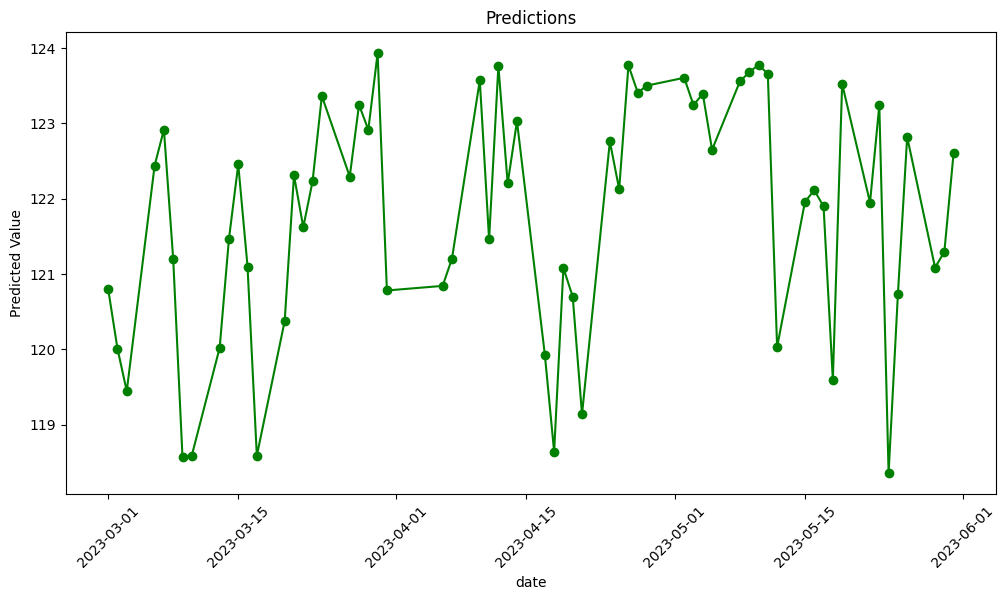

In [163]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

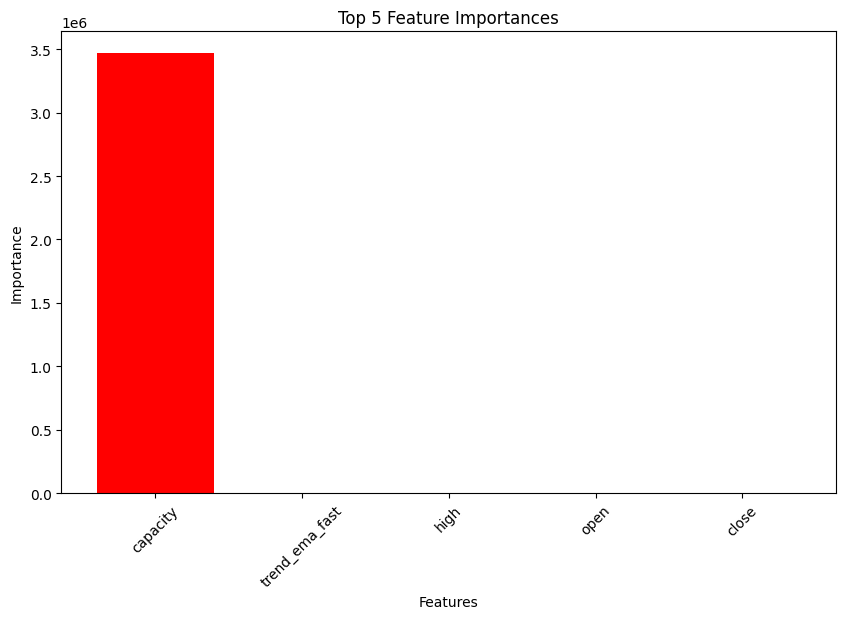

In [164]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['open', 'high', 'low', 'close', 'capacity', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 80, 'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 4}
最佳相对误差: 2.3592176177861774 %


RandomForestRegressor(max_depth=4, min_samples_leaf=4, random_state=2023)

In [166]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[79.37565907 79.42213946 79.25738984 79.37565907 79.07226482 76.11085612
 74.88985526 79.37565907 79.42213946 79.50345946 79.50345946 81.18717149
 80.34962275 79.37565907 79.96786221 81.08326905 79.37565907 79.37565907
 79.42213946 79.37565907 77.60556257 77.60556257 71.85591373 71.85591373
 71.85591373 71.85591373 72.4759838  72.4759838  68.0289633  67.02406881
 71.0382683  66.95302298 71.85591373 72.52597016 72.4759838  75.04993367
 72.4759838  72.09436293 71.85591373 71.85591373 72.4759838  71.85591373
 71.85591373 72.4759838  73.07723144 74.88985526 72.93438103 72.52597016
 78.99160876 75.04993367 72.52597016 71.85591373 67.17797228 67.02406881
 67.02406881 65.75550894 65.15190602 65.08151061 65.08151061 65.08151061
 65.08151061 65.08151061]


In [167]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['date'] >= start_date_predict) & (df['date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


          date  predictions_RF
277 2023-03-01       79.375659
278 2023-03-02       79.422139
279 2023-03-03       79.257390
280 2023-03-06       79.375659
281 2023-03-07       79.072265
..         ...             ...
334 2023-05-25       65.081511
335 2023-05-26       65.081511
336 2023-05-29       65.081511
337 2023-05-30       65.081511
338 2023-05-31       65.081511

[62 rows x 2 columns]


In [168]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'date']
max_date = selected_data_RF.loc[max_index, 'date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-05-25 00:00:00
最低值： 65.0815106108717
最高值日期： 2023-03-16 00:00:00
最高值： 81.18717149278262


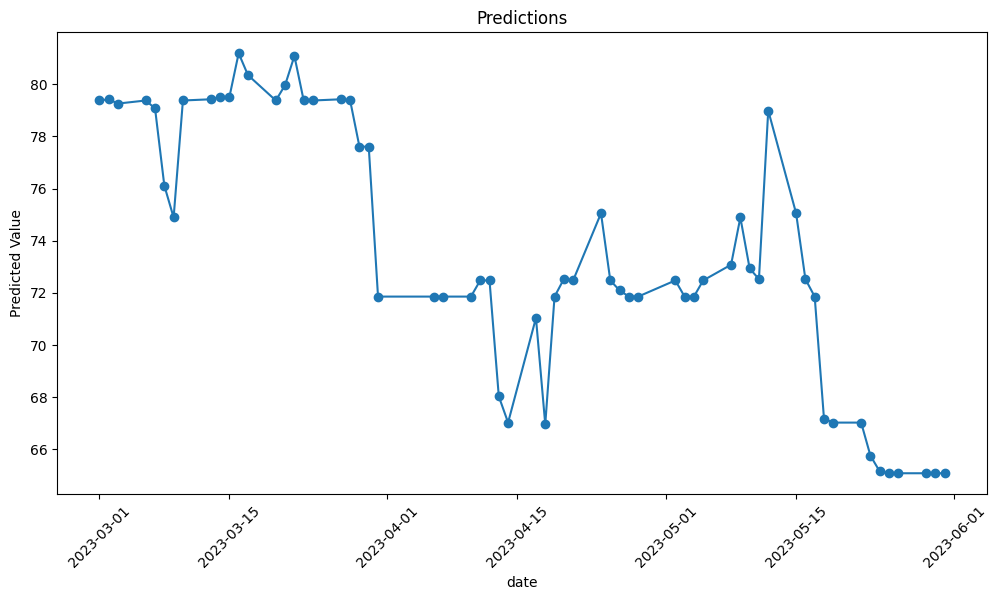

In [169]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



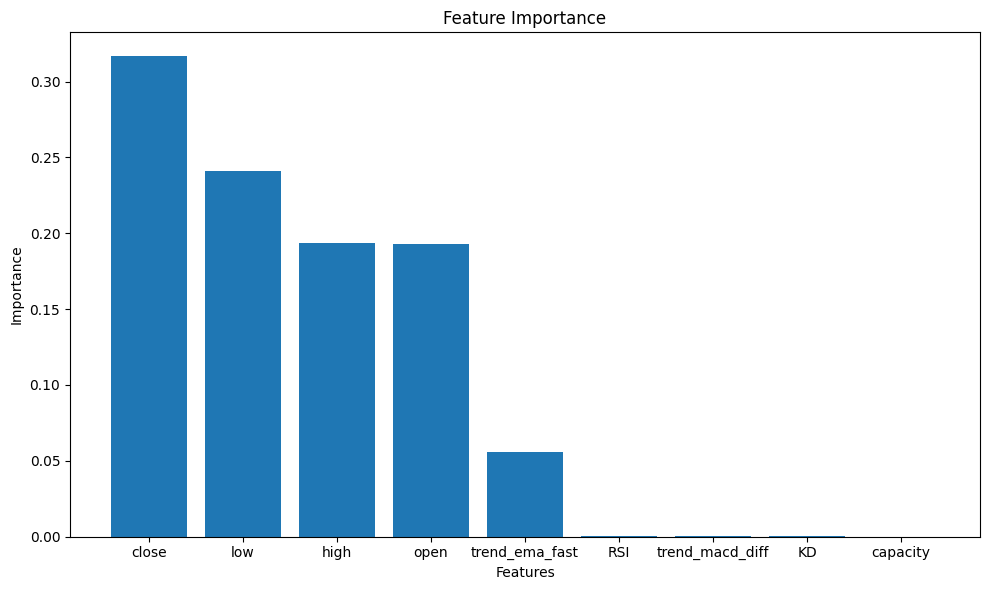

In [170]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [171]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['open', 'high', 'low', 'close', 'capacity', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [172]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[49.236206 49.236206 49.236206 49.236206 49.236206 47.92362  47.480553
 49.236206 49.236206 49.236206 49.236206 49.236206 49.236206 49.236206
 49.236206 49.236206 49.236206 49.236206 49.236206 49.236206 48.446976
 48.446976 45.619343 45.366043 45.366043 45.366043 46.351906 46.351906
 44.019527 43.84081  44.678627 43.84081  45.366043 46.496037 46.351906
 47.55952  46.42672  45.963017 45.366043 45.619343 46.42672  45.366043
 45.539494 46.496037 46.985085 47.55952  46.891563 46.496037 49.09239
 47.55952  46.496037 45.366043 43.84081  43.84081  43.84081  43.46004
 42.841763 42.841763 42.841763 42.841763 42.841763 42.841763]


In [174]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['date'] >= start_date_predict) & (df['date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




          date  predictions_XG
277 2023-03-01       49.236206
278 2023-03-02       49.236206
279 2023-03-03       49.236206
280 2023-03-06       49.236206
281 2023-03-07       49.236206
..         ...             ...
334 2023-05-25       42.841763
335 2023-05-26       42.841763
336 2023-05-29       42.841763
337 2023-05-30       42.841763
338 2023-05-31       42.841763

[62 rows x 2 columns]


In [175]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'date']
max_date = selected_data_XG.loc[max_index, 'date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-05-24 00:00:00
最低值： 42.841763
最高值日期： 2023-03-01 00:00:00
最高值： 49.236206


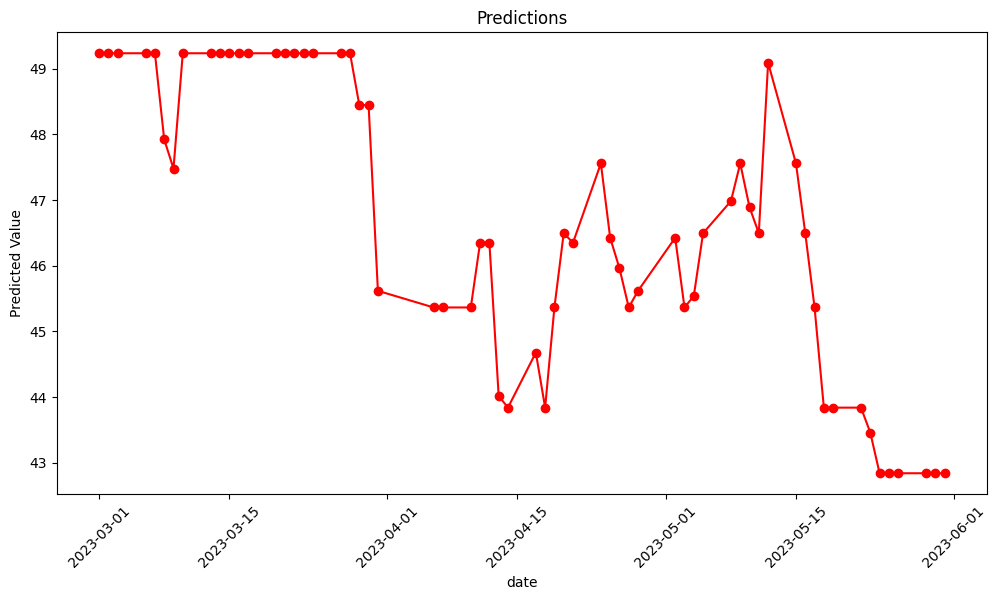

In [176]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



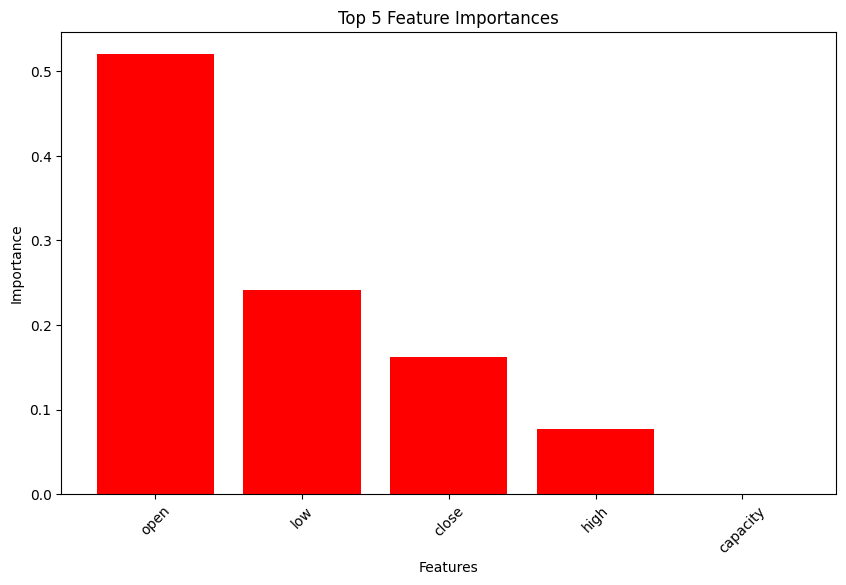

In [177]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


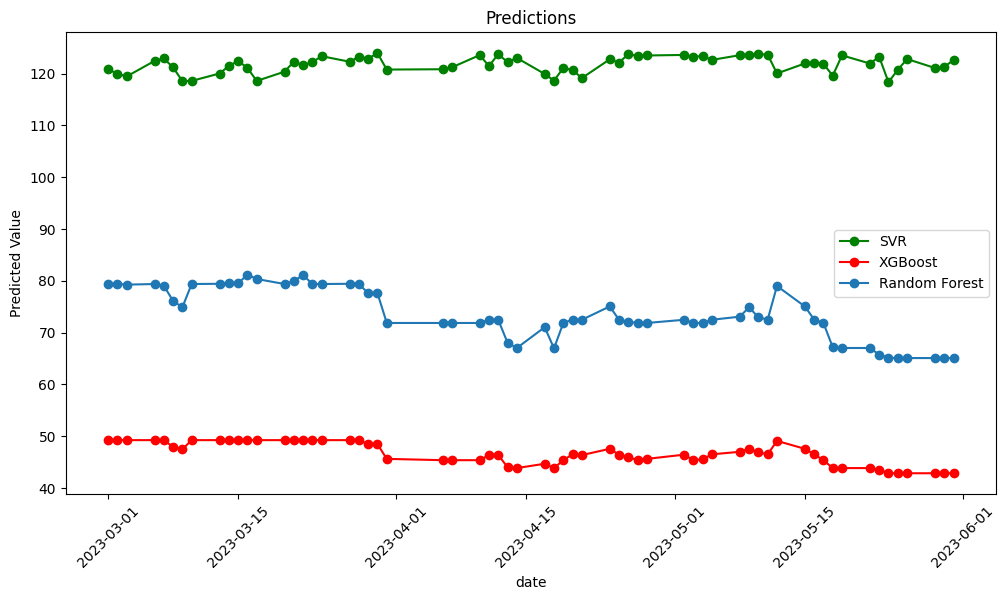

In [178]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
